In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

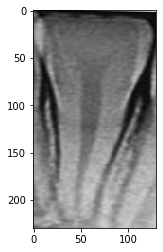

In [4]:
DATADIR = 'C:/Users/USER/Desktop/xrays database'
CATEGORIES = ['1 root','2 or more roots']

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap = "gray")
        plt.show()
        break
    break


In [5]:
print(img_array)

[[ 32  23  14 ... 255 255 255]
 [ 69  59  44 ... 200 206 207]
 [ 97  88  71 ...  18  20  21]
 ...
 [129 125 124 ... 195 195 194]
 [109 106 106 ... 195 195 194]
 [101  99 101 ... 197 195 193]]


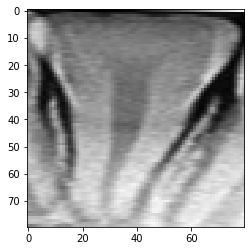

In [6]:
IMG_SIZE = 80
new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
plt.imshow(new_array,cmap = 'gray')
plt.show()

In [15]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
CATEGORIES2 = ['1 root(test)','2 or more roots(test)']
testing_data = []
def create_testing_data():
    for category in CATEGORIES2:
        class_num = CATEGORIES2.index(category)
        path = os.path.join(DATADIR,category)
        for img in os.listdir(path):
            try:
                test_img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                test_new_array = cv2.resize(test_img_array,(IMG_SIZE, IMG_SIZE))
                testing_data.append([test_new_array,class_num])
            except Exception as e:
                pass

In [16]:
create_training_data()
create_testing_data()

In [17]:
print(len(training_data))
print(len(testing_data))

103
12


In [22]:
import random
random.shuffle(training_data)
random.shuffle(testing_data)

In [23]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
1
1
1
0
0
0
1


In [24]:
x = []
y = []
for features,label in training_data:
    x.append(features)
    y.append(label)
x = np.array(x).reshape(-1,IMG_SIZE,IMG_SIZE,1)

p=[]
q=[]
for features,label in testing_data:
    p.append(features)
    q.append(label)
p = np.array(p).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [25]:
print(q)

[1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0]


In [27]:
import pickle


In [28]:
pickle_out = open('x.pickle','wb')
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out = open('y.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close()

pickle_out = open('p.pickle','wb')
pickle.dump(p,pickle_out)
pickle_out.close()

pickle_out = open('q.pickle','wb')
pickle.dump(q,pickle_out)
pickle_out.close()





In [29]:
pickle_in = open('x.pickle','rb')
x = pickle.load(pickle_in)
pickle_in = open('y.pickle','rb')
y = pickle.load(pickle_in)

In [30]:
y

[0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0]

In [31]:
x.shape[0]  #number of training examples
x.shape[1]  #image size
x.shape

(103, 80, 80, 1)

In [32]:
y

[0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0]